Introducción: ¿Cómo está el clima?

El presente proyecto tiene como objetivo general desarrollar e implementar sistemas de clasificación de imágenes climáticas mediante el uso de arquitecturas de redes neuronales convolucionales. La investigación se centra en dos enfoques principales: por un lado, la utilización de ResNet (Residual Networks) como representante de arquitecturas profundas preentrenadas con capacidad de aprendizaje de características complejas mediante conexiones residuales; y por otro lado, el diseño y entrenamiento de redes convolucionales desde cero, permitiendo un análisis comparativo del rendimiento entre ambas aproximaciones.

El dataset empleado presenta características particulares que lo convierten en un caso de estudio adecuado para este propósito. Se trata de un conjunto de datos fundamentalmente sencillo en su estructura, compuesto por tres categorías climáticas claramente definidas y mutuamente excluyentes. Esta simplicidad conceptual se manifiesta en la ausencia de etiquetas combinadas o clases híbridas, donde cada imagen pertenece inequívocamente a una sola categoría, eliminando ambigüedades en el proceso de clasificación.

La naturaleza bien delimitada del conjunto de datos, con categorías discretas y no superpuestas, proporciona un escenario controlado ideal para evaluar las capacidades de extracción de características tanto de redes preentrenadas como de arquitecturas personalizadas, estableciendo las bases para comprender cómo diferentes enfoques de aprendizaje profundo abordan problemas de visión por computadora en dominios específicos como la meteorología visual.

Probando importación básica...
✅ Archivo ZIP encontrado: 95740914 bytes
Iniciando descompresión...
Archivos en el ZIP: 1125
✅ Archivo descomprimido exitosamente en: /home/bruno/Machine Learning/images_del_clima

📁 Explorando estructura en: /home/bruno/Machine Learning/images_del_clima
Elementos en el directorio: 1
📁 Directorio: dataset2

🔎 Analizando categorías...

🔍 Total de imágenes encontradas: 1125

📊 Categorías encontradas:
  🏷️  dataset2: 1125 imágenes
    Ejemplos: ['sunrise86.jpg', 'cloudy235.jpg', 'rain82.jpg']

🖼️ Mostrando 3 ejemplos por categoría:

📸 Categoría: dataset2


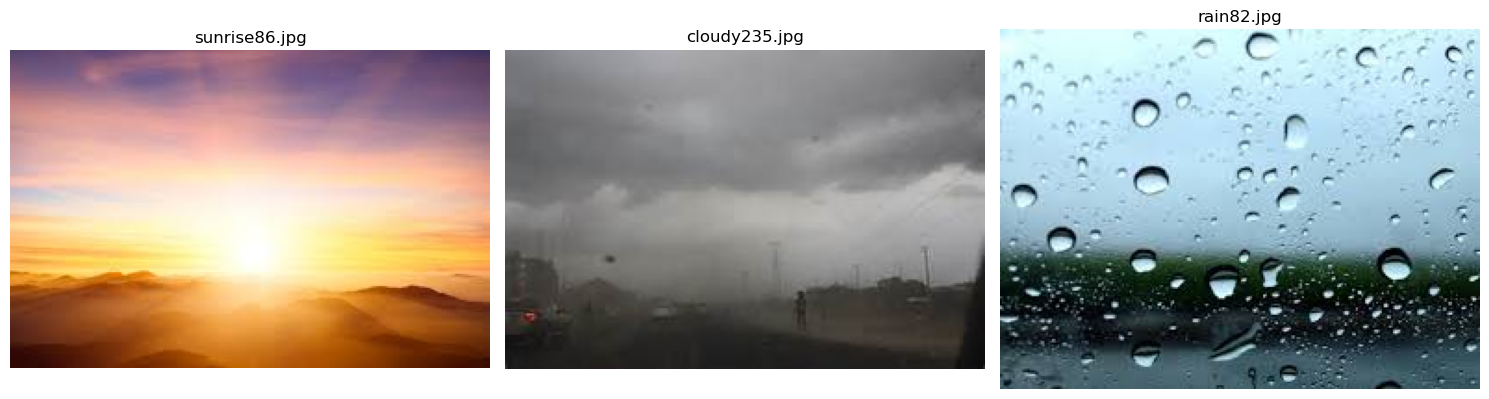


📈 ESTADÍSTICAS FINALES:
📂 Directorio base: /home/bruno/Machine Learning/images_del_clima
🏷️  Total de categorías: 1
🖼️  Total de imágenes: 1125

🏆 Top categorías:
  1. dataset2: 1125 imágenes (100.0%)


In [50]:
import zipfile
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

print("Probando importación básica...")

# 1. Ruta del archivo ZIP
zip_path = '/home/bruno/Machine Learning/imagenes_del_clima.zip'
extract_path = '/home/bruno/Machine Learning/images_del_clima'

# Verificar si el archivo ZIP existe
if not os.path.exists(zip_path):
    print(f"❌ El archivo {zip_path} no existe")
    exit()

print(f"✅ Archivo ZIP encontrado: {os.path.getsize(zip_path)} bytes")

# 2. Crear directorio si no existe
os.makedirs(extract_path, exist_ok=True)

print("Iniciando descompresión...")

# 3. Descomprimir el archivo
try:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        file_list = zip_ref.namelist()
        print(f"Archivos en el ZIP: {len(file_list)}")
        zip_ref.extractall(extract_path)
    print(f"✅ Archivo descomprimido exitosamente en: {extract_path}")
except Exception as e:
    print(f"❌ Error al descomprimir: {e}")

# 4. Definir dataset_path y explorar estructura
dataset_path = extract_path  # Usar la ruta de extracción directamente

print(f"\n📁 Explorando estructura en: {dataset_path}")

# Ver qué hay en el directorio
contenido = os.listdir(dataset_path)
print(f"Elementos en el directorio: {len(contenido)}")
for item in contenido[:10]:  # Mostrar primeros 10 elementos
    ruta_completa = os.path.join(dataset_path, item)
    if os.path.isdir(ruta_completa):
        print(f"📁 Directorio: {item}")
    else:
        print(f"📄 Archivo: {item} ({os.path.getsize(ruta_completa)} bytes)")

# 5. Explorar las categorías disponibles
def explorar_dataset(ruta_base):
    """Explora la estructura del dataset"""
    categorias = {}
    total_imagenes = 0
    
    # Buscar recursivamente todas las imágenes
    for root, dirs, files in os.walk(ruta_base):
        for archivo in files:
            if archivo.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
                total_imagenes += 1
                # Intentar extraer categoría de diferentes formas
                ruta_relativa = os.path.relpath(root, ruta_base)
                if ruta_relativa == '.':
                    # Si está en la raíz, usar nombre del archivo
                    categoria = archivo.split('_')[0] if '_' in archivo else archivo.split('.')[0]
                else:
                    # Usar nombre del directorio como categoría
                    categoria = os.path.basename(root)
                
                if categoria not in categorias:
                    categorias[categoria] = []
                categorias[categoria].append(os.path.join(root, archivo))
    
    print(f"\n🔍 Total de imágenes encontradas: {total_imagenes}")
    return categorias

# Explorar categorías
print("\n🔎 Analizando categorías...")
categorias = explorar_dataset(dataset_path)

print("\n📊 Categorías encontradas:")
for cat, archivos in sorted(categorias.items(), key=lambda x: len(x[1]), reverse=True):
    print(f"  🏷️  {cat}: {len(archivos)} imágenes")
    # Mostrar algunos ejemplos de cada categoría
    if len(archivos) > 0:
        print(f"    Ejemplos: {[os.path.basename(archivo) for archivo in archivos[:3]]}")

# 6. Mostrar algunas imágenes de ejemplo
def mostrar_ejemplos(categorias, num_ejemplos=3):
    """Muestra ejemplos de imágenes de cada categoría"""
    print(f"\n🖼️ Mostrando {num_ejemplos} ejemplos por categoría:")
    
    for categoria, archivos in list(categorias.items())[:5]:  # Mostrar solo primeras 5 categorías
        if len(archivos) >= num_ejemplos:
            print(f"\n📸 Categoría: {categoria}")
            
            fig, axes = plt.subplots(1, num_ejemplos, figsize=(15, 5))
            if num_ejemplos == 1:
                axes = [axes]
            
            for i, archivo in enumerate(archivos[:num_ejemplos]):
                try:
                    img = Image.open(archivo)
                    axes[i].imshow(img)
                    axes[i].set_title(f"{os.path.basename(archivo)}")
                    axes[i].axis('off')
                except Exception as e:
                    print(f"Error cargando {archivo}: {e}")
                    axes[i].text(0.5, 0.5, f"Error\n{os.path.basename(archivo)}", 
                               ha='center', va='center', transform=axes[i].transAxes)
                    axes[i].axis('off')
            
            plt.tight_layout()
            plt.show()

# Mostrar ejemplos (si hay suficientes imágenes)
if sum(len(archivos) for archivos in categorias.values()) > 0:
    mostrar_ejemplos(categorias, 3)
else:
    print("❌ No se encontraron imágenes en el dataset")

# 7. Estadísticas finales
print(f"\n📈 ESTADÍSTICAS FINALES:")
print(f"📂 Directorio base: {dataset_path}")
print(f"🏷️  Total de categorías: {len(categorias)}")
print(f"🖼️  Total de imágenes: {sum(len(archivos) for archivos in categorias.values())}")

# Distribución de categorías
if categorias:
    categorias_ordenadas = sorted(categorias.items(), key=lambda x: len(x[1]), reverse=True)
    print(f"\n🏆 Top categorías:")
    for i, (cat, archivos) in enumerate(categorias_ordenadas[:10]):
        print(f"  {i+1}. {cat}: {len(archivos)} imágenes ({len(archivos)/sum(len(a) for a in categorias.values())*100:.1f}%)")

Analizando etiquetas del dataset...
🔍 Buscando imágenes en: /home/bruno/Machine Learning/images_del_clima/dataset2

📊 ESTADÍSTICAS DE ETIQUETAS:
🖼️  Total de imágenes analizadas: 1125
🏷️  Total de etiquetas únicas: 4

📈 DISTRIBUCIÓN POR ETIQUETA:
   1. sunrise        :  357 imágenes ( 31.7%)
   2. cloudy         :  300 imágenes ( 26.7%)
   3. shine          :  253 imágenes ( 22.5%)
   4. rain           :  215 imágenes ( 19.1%)

🖼️ MOSTRANDO EJEMPLOS POR ETIQUETA:

📸 Etiqueta: 'sunrise' (357 imágenes)


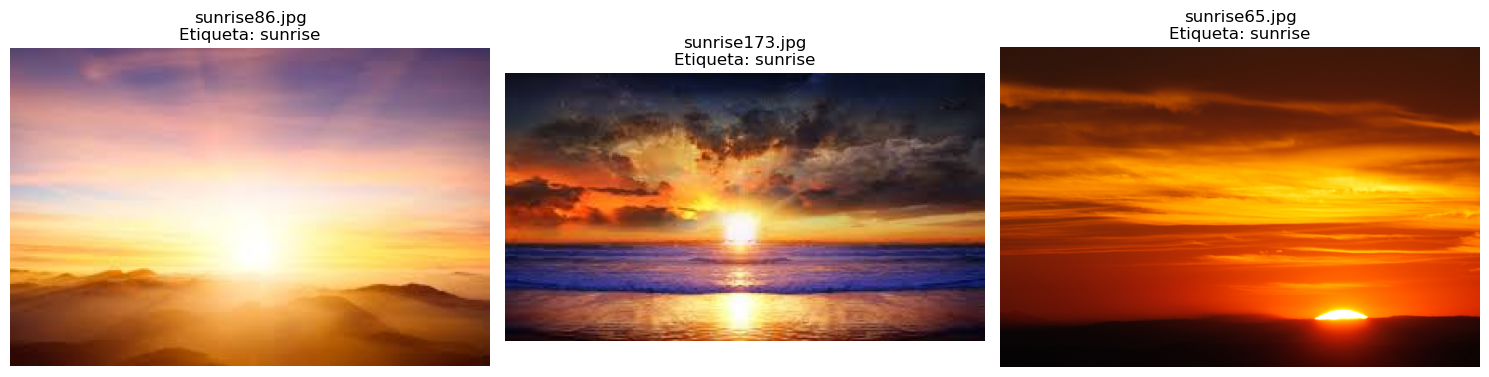


📸 Etiqueta: 'cloudy' (300 imágenes)


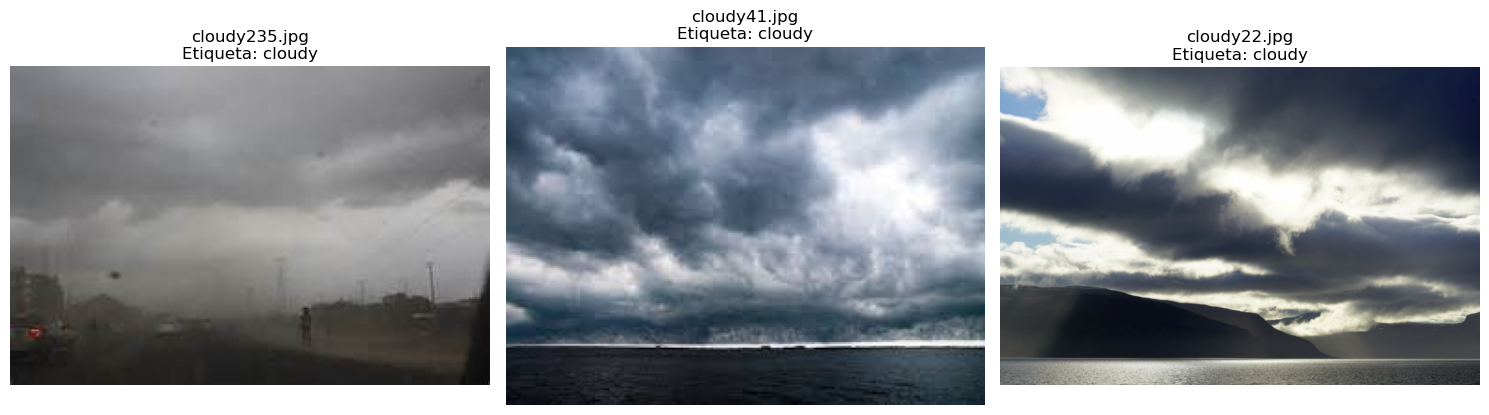


📸 Etiqueta: 'shine' (253 imágenes)


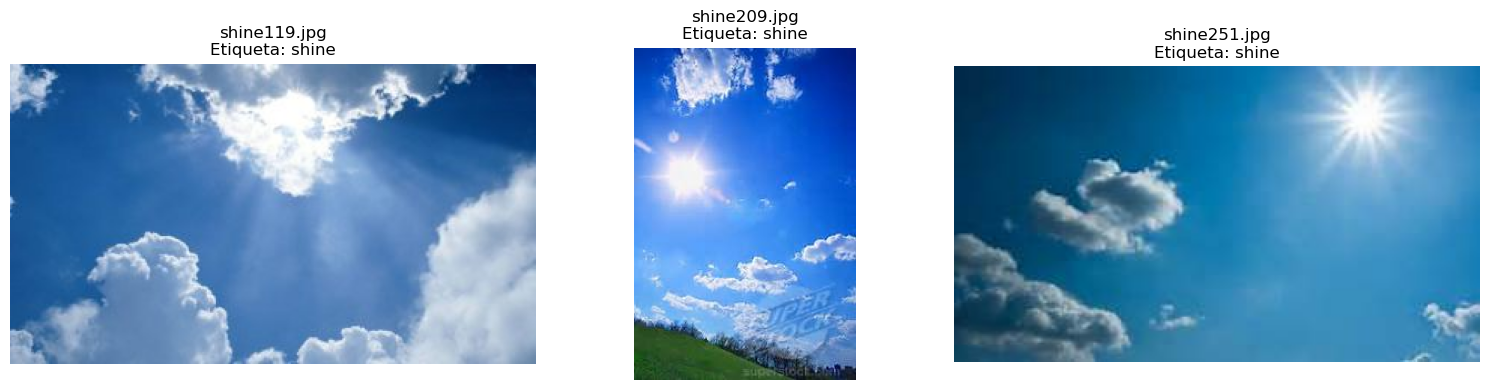


📸 Etiqueta: 'rain' (215 imágenes)


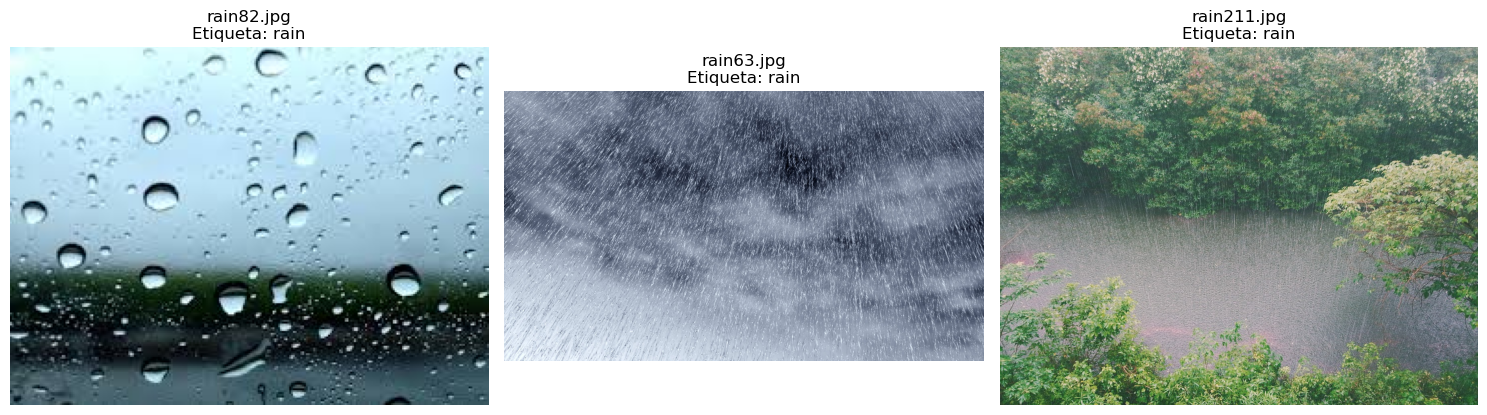


📊 GRÁFICO DE DISTRIBUCIÓN:


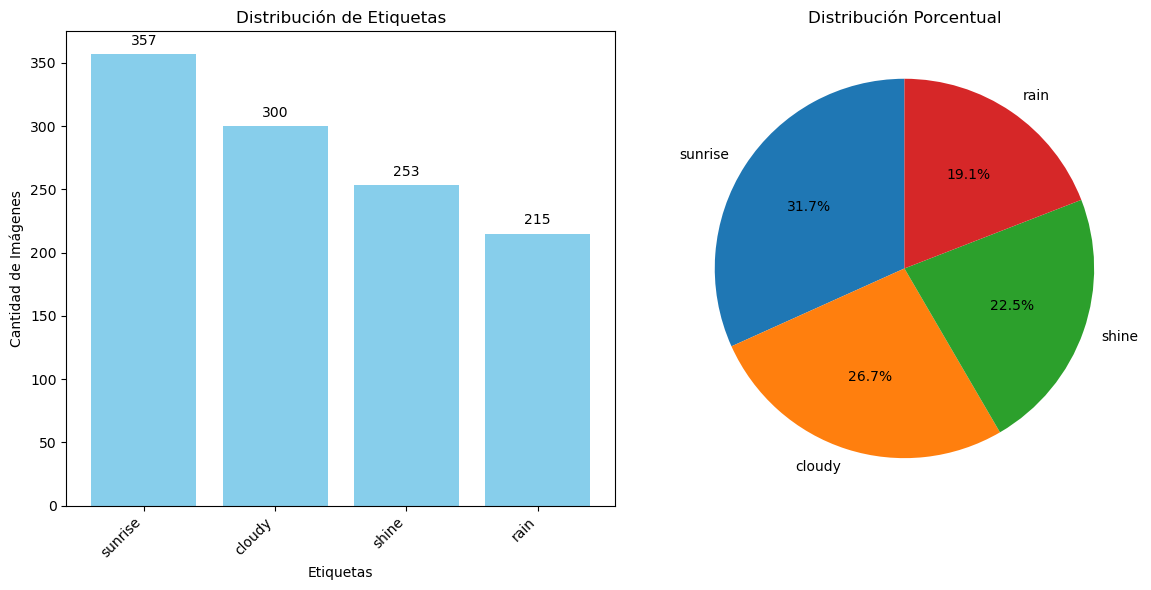


🎯 RESUMEN FINAL:
📁 Directorio analizado: /home/bruno/Machine Learning/images_del_clima/dataset2
🖼️  Total de imágenes: 1125
🏷️  Etiquetas encontradas: ['sunrise', 'cloudy', 'rain', 'shine']
📊 Distribución: {'sunrise': 357, 'cloudy': 300, 'rain': 215, 'shine': 253}


In [3]:
import zipfile
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

print("Analizando etiquetas del dataset...")

# Ruta del dataset extraído
dataset_path = '/home/bruno/Machine Learning/images_del_clima'

# Función para extraer etiquetas de los nombres de archivo
def extraer_etiquetas(dataset_path):
    """Extrae y cuenta las etiquetas de las imágenes"""
    etiquetas = []
    rutas_imagenes = []
    
    # Buscar todas las imágenes en el directorio dataset2
    dataset2_path = os.path.join(dataset_path, 'dataset2')
    
    if not os.path.exists(dataset2_path):
        print(f"❌ No se encontró el directorio dataset2 en: {dataset_path}")
        return {}, []
    
    print(f"🔍 Buscando imágenes en: {dataset2_path}")
    
    # Recorrer todos los archivos en dataset2
    for archivo in os.listdir(dataset2_path):
        if archivo.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
            ruta_completa = os.path.join(dataset2_path, archivo)
            rutas_imagenes.append(ruta_completa)
            
            # Extraer etiqueta del nombre del archivo
            # Ejemplo: "sunrise86.jpg" -> "sunrise"
            # Ejemplo: "cloudy235.jpg" -> "cloudy" 
            # Ejemplo: "rain82.jpg" -> "rain"
            nombre_sin_extension = os.path.splitext(archivo)[0]
            
            # Eliminar números del final para obtener la etiqueta
            etiqueta = ''.join([c for c in nombre_sin_extension if not c.isdigit()])
            etiquetas.append(etiqueta)
    
    return etiquetas, rutas_imagenes

# Extraer etiquetas
etiquetas, rutas_imagenes = extraer_etiquetas(dataset_path)

if not etiquetas:
    print("❌ No se encontraron imágenes para analizar")
    exit()

# Contar etiquetas
contador_etiquetas = Counter(etiquetas)
etiquetas_ordenadas = sorted(contador_etiquetas.items(), key=lambda x: x[1], reverse=True)

# Mostrar resultados
print(f"\n📊 ESTADÍSTICAS DE ETIQUETAS:")
print(f"🖼️  Total de imágenes analizadas: {len(etiquetas)}")
print(f"🏷️  Total de etiquetas únicas: {len(contador_etiquetas)}")
print(f"\n📈 DISTRIBUCIÓN POR ETIQUETA:")

for i, (etiqueta, cantidad) in enumerate(etiquetas_ordenadas, 1):
    porcentaje = (cantidad / len(etiquetas)) * 100
    print(f"  {i:2d}. {etiqueta:15s}: {cantidad:4d} imágenes ({porcentaje:5.1f}%)")

# Mostrar algunos ejemplos de cada etiqueta
def mostrar_ejemplos_por_etiqueta(etiquetas, rutas_imagenes, max_etiquetas=8, ejemplos_por_etiqueta=3):
    """Muestra ejemplos de imágenes para cada etiqueta"""
    print(f"\n🖼️ MOSTRANDO EJEMPLOS POR ETIQUETA:")
    
    # Agrupar imágenes por etiqueta
    imagenes_por_etiqueta = {}
    for etiqueta, ruta in zip(etiquetas, rutas_imagenes):
        if etiqueta not in imagenes_por_etiqueta:
            imagenes_por_etiqueta[etiqueta] = []
        imagenes_por_etiqueta[etiqueta].append(ruta)
    
    # Mostrar solo las etiquetas más comunes
    etiquetas_comunes = sorted(imagenes_por_etiqueta.keys(), 
                              key=lambda x: len(imagenes_por_etiqueta[x]), 
                              reverse=True)[:max_etiquetas]
    
    for etiqueta in etiquetas_comunes:
        imagenes = imagenes_por_etiqueta[etiqueta]
        print(f"\n📸 Etiqueta: '{etiqueta}' ({len(imagenes)} imágenes)")
        
        # Mostrar ejemplos
        fig, axes = plt.subplots(1, min(ejemplos_por_etiqueta, len(imagenes)), figsize=(15, 4))
        if ejemplos_por_etiqueta == 1:
            axes = [axes]
        
        for i, archivo in enumerate(imagenes[:ejemplos_por_etiqueta]):
            try:
                img = Image.open(archivo)
                axes[i].imshow(img)
                nombre_archivo = os.path.basename(archivo)
                axes[i].set_title(f"{nombre_archivo}\nEtiqueta: {etiqueta}")
                axes[i].axis('off')
            except Exception as e:
                print(f"Error cargando {archivo}: {e}")
                axes[i].text(0.5, 0.5, f"Error\n{os.path.basename(archivo)}", 
                           ha='center', va='center', transform=axes[i].transAxes)
                axes[i].axis('off')
        
        plt.tight_layout()
        plt.show()

# Mostrar ejemplos
mostrar_ejemplos_por_etiqueta(etiquetas, rutas_imagenes)

# Gráfico de distribución
print(f"\n📊 GRÁFICO DE DISTRIBUCIÓN:")

plt.figure(figsize=(12, 6))
etiquetas_nombres = [item[0] for item in etiquetas_ordenadas]
etiquetas_cantidades = [item[1] for item in etiquetas_ordenadas]

# Gráfico de barras
plt.subplot(1, 2, 1)
bars = plt.bar(etiquetas_nombres, etiquetas_cantidades, color='skyblue')
plt.title('Distribución de Etiquetas')
plt.xlabel('Etiquetas')
plt.ylabel('Cantidad de Imágenes')
plt.xticks(rotation=45, ha='right')

# Añadir valores en las barras
for bar, cantidad in zip(bars, etiquetas_cantidades):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             str(cantidad), ha='center', va='bottom')

# Gráfico de pie (solo para las principales etiquetas)
plt.subplot(1, 2, 2)
# Mostrar solo etiquetas con más del 1% del total
umbel_porcentaje = 1.0
etiquetas_significativas = [(etq, cant) for etq, cant in etiquetas_ordenadas 
                           if (cant/len(etiquetas))*100 >= umbel_porcentaje]

if len(etiquetas_significativas) > 1:
    etq_nombres = [item[0] for item in etiquetas_significativas]
    etq_cantidades = [item[1] for item in etiquetas_significativas]
    otros = sum([cant for etq, cant in etiquetas_ordenadas 
                if (cant/len(etiquetas))*100 < umbel_porcentaje])
    
    if otros > 0:
        etq_nombres.append('Otros')
        etq_cantidades.append(otros)
    
    plt.pie(etq_cantidades, labels=etq_nombres, autopct='%1.1f%%', startangle=90)
    plt.title('Distribución Porcentual')
else:
    plt.pie(etiquetas_cantidades, labels=etiquetas_nombres, autopct='%1.1f%%', startangle=90)
    plt.title('Distribución Porcentual')

plt.tight_layout()
plt.show()

# Resumen final
print(f"\n🎯 RESUMEN FINAL:")
print(f"📁 Directorio analizado: {os.path.join(dataset_path, 'dataset2')}")
print(f"🖼️  Total de imágenes: {len(etiquetas)}")
print(f"🏷️  Etiquetas encontradas: {list(contador_etiquetas.keys())}")
print(f"📊 Distribución: {dict(contador_etiquetas)}")

🎯 ANÁLISIS COMPLETO DEL DATASET DE CLIMA

📊 ESTADÍSTICAS BÁSICAS:
🖼️  Total de imágenes: 1125
🏷️  Total de etiquetas: 4
📁 Directorio: /home/bruno/Machine Learning/images_del_clima/dataset2

📈 DISTRIBUCIÓN DETALLADA POR ETIQUETA:
--------------------------------------------------
ETIQUETA     CANTIDAD   PORCENTAJE   BARRA
--------------------------------------------------
sunrise      357        31.7      %  ██████
cloudy       300        26.7      %  █████
rain         215        19.1      %  ███
shine        253        22.5      %  ████

📊 CREANDO VISUALIZACIONES...


/tmp/ipykernel_28231/3052468550.py:97: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_28231/3052468550.py:97: UserWarning: Glyph 129383 (\N{PIE}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_28231/3052468550.py:97: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_28231/3052468550.py:97: UserWarning: Glyph 127849 (\N{DOUGHNUT}) missing from current font.
  plt.tight_layout()
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129383 (\N{PIE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.c

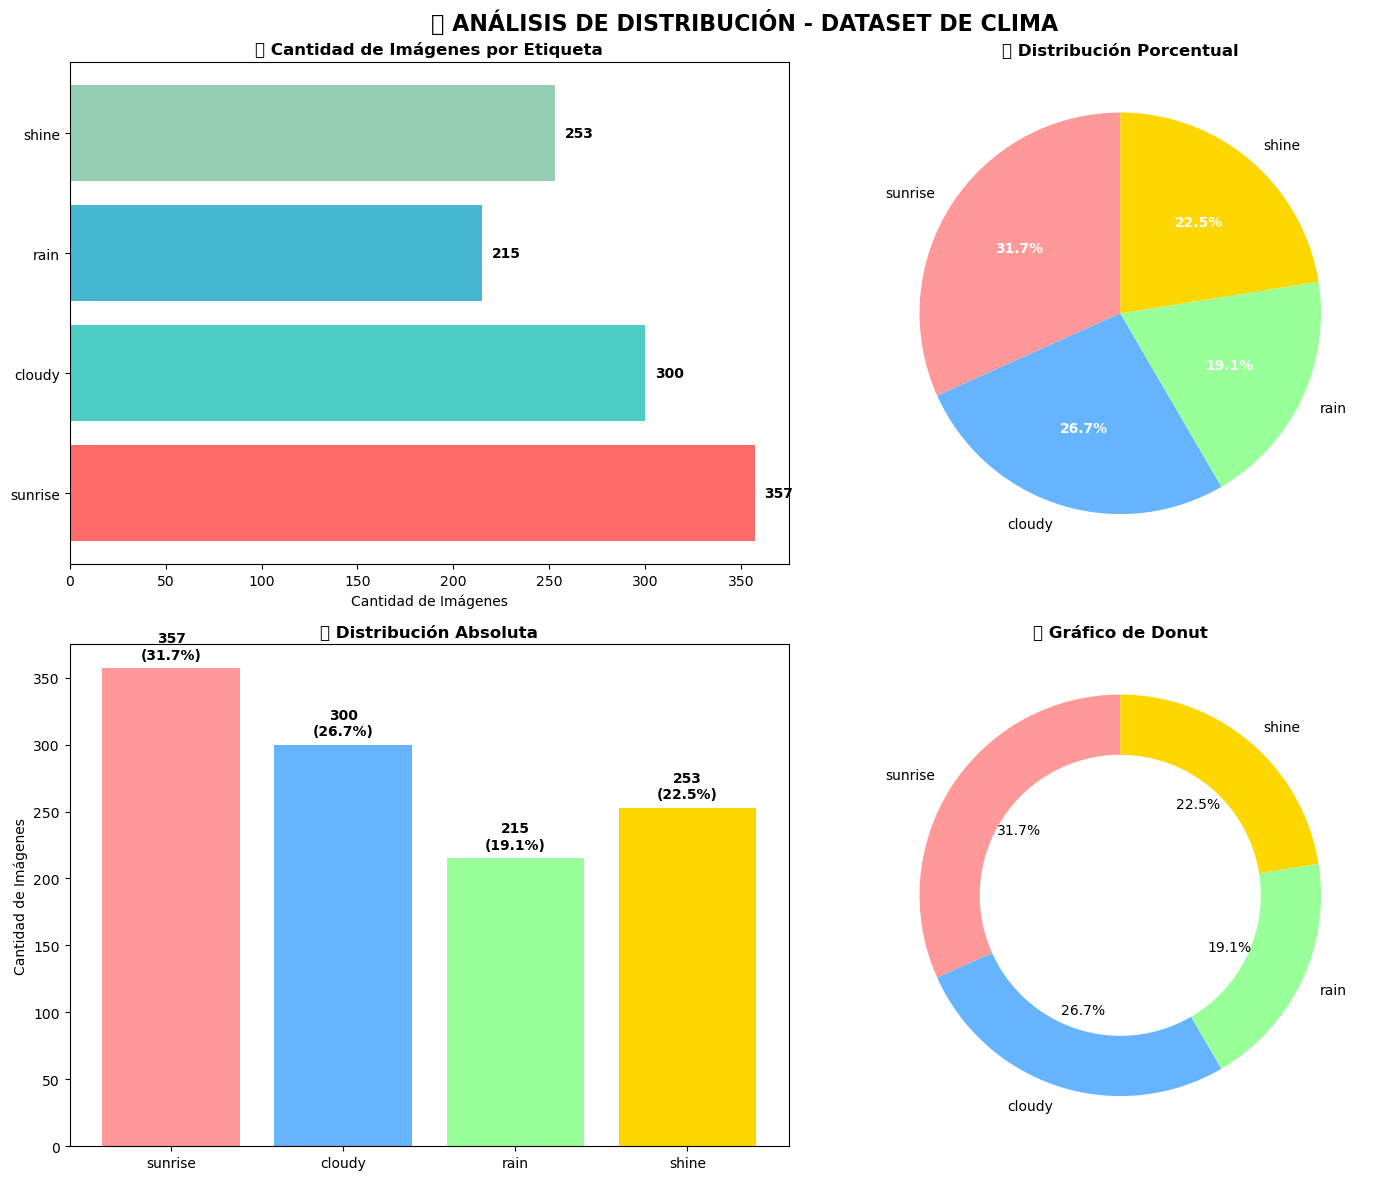


⚖️ ANÁLISIS DE BALANCE DEL DATASET:
   Máxima cantidad: 357 (sunrise)
   Mínima cantidad: 215 (rain)
   Ratio de balance: 0.60
   ⚠️ Dataset MODERADAMENTE BALANCEADO

🎯 RESUMEN EJECUTIVO:
🌅 SUNRISE: 357 imágenes (31.7%) - Mayor categoría
☁️  CLOUDY:  300 imágenes (26.7%) - Segunda categoría
☀️  SHINE:   253 imágenes (22.5%) - Tercera categoría
🌧️  RAIN:    215 imágenes (19.1%) - Menor categoría

💡 RECOMENDACIONES PARA MODELADO DE MACHINE LEARNING:
   • Considera usar stratified sampling
   • Usa F1-score en lugar de accuracy como métrica principal
   • Considera data augmentation para las clases minoritarias
   • Tamaño total adecuado para proyectos de aprendizaje profundo
   • 4 clases es un buen número para clasificación multiclase

📋 TABLA RESUMEN FINAL:
+--------------------------------------+
| ETIQUETA     | CANTIDAD | %        |
+--------------------------------------+
| sunrise      |      357 |    31.7% |
| cloudy       |      300 |    26.7% |
| rain         |      215 |    1

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
import os

# Datos obtenidos del análisis
etiquetas = ['sunrise', 'cloudy', 'rain', 'shine']
distribucion = {'sunrise': 357, 'cloudy': 300, 'rain': 215, 'shine': 253}
total_imagenes = 1125

print("=" * 60)
print("🎯 ANÁLISIS COMPLETO DEL DATASET DE CLIMA")
print("=" * 60)

# 1. Mostrar estadísticas básicas
print(f"\n📊 ESTADÍSTICAS BÁSICAS:")
print(f"🖼️  Total de imágenes: {total_imagenes}")
print(f"🏷️  Total de etiquetas: {len(etiquetas)}")
print(f"📁 Directorio: /home/bruno/Machine Learning/images_del_clima/dataset2")

# 2. Mostrar distribución detallada
print(f"\n📈 DISTRIBUCIÓN DETALLADA POR ETIQUETA:")
print("-" * 50)
print(f"{'ETIQUETA':<12} {'CANTIDAD':<10} {'PORCENTAJE':<12} {'BARRA'}")
print("-" * 50)

for etiqueta in etiquetas:
    cantidad = distribucion[etiqueta]
    porcentaje = (cantidad / total_imagenes) * 100
    barra = "█" * int(porcentaje / 5)  # Cada █ representa 5%
    print(f"{etiqueta:<12} {cantidad:<10} {porcentaje:<10.1f}%  {barra}")

# 3. Crear DataFrame para análisis
df_estadisticas = pd.DataFrame([
    {'Etiqueta': 'sunrise', 'Cantidad': 357, 'Porcentaje': 31.7},
    {'Etiqueta': 'cloudy', 'Cantidad': 300, 'Porcentaje': 26.7},
    {'Etiqueta': 'rain', 'Cantidad': 215, 'Porcentaje': 19.1},
    {'Etiqueta': 'shine', 'Cantidad': 253, 'Porcentaje': 22.5}
])

# 4. Visualizaciones
print(f"\n📊 CREANDO VISUALIZACIONES...")

# Configurar el estilo
plt.style.use('default')
sns.set_palette("husl")

# Crear figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('📊 ANÁLISIS DE DISTRIBUCIÓN - DATASET DE CLIMA', fontsize=16, fontweight='bold')

# Gráfico 1: Barras horizontales
axes[0, 0].barh(df_estadisticas['Etiqueta'], df_estadisticas['Cantidad'], color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
axes[0, 0].set_title('📏 Cantidad de Imágenes por Etiqueta', fontweight='bold')
axes[0, 0].set_xlabel('Cantidad de Imágenes')
for i, v in enumerate(df_estadisticas['Cantidad']):
    axes[0, 0].text(v + 5, i, f'{v}', va='center', fontweight='bold')

# Gráfico 2: Pie chart
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFD700']
wedges, texts, autotexts = axes[0, 1].pie(
    df_estadisticas['Cantidad'], 
    labels=df_estadisticas['Etiqueta'], 
    autopct='%1.1f%%',
    colors=colors,
    startangle=90
)
axes[0, 1].set_title('🥧 Distribución Porcentual', fontweight='bold')
# Mejorar los textos
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# Gráfico 3: Barras con valores
bars = axes[1, 0].bar(df_estadisticas['Etiqueta'], df_estadisticas['Cantidad'], color=colors)
axes[1, 0].set_title('📊 Distribución Absoluta', fontweight='bold')
axes[1, 0].set_ylabel('Cantidad de Imágenes')
# Añadir valores en las barras
for bar, cantidad in zip(bars, df_estadisticas['Cantidad']):
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 5,
                   f'{cantidad}\n({cantidad/total_imagenes*100:.1f}%)',
                   ha='center', va='bottom', fontweight='bold')

# Gráfico 4: Donut chart
axes[1, 1].pie(
    df_estadisticas['Cantidad'], 
    labels=df_estadisticas['Etiqueta'], 
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    wedgeprops=dict(width=0.3)
)
axes[1, 1].set_title('🍩 Gráfico de Donut', fontweight='bold')

plt.tight_layout()
plt.show()

# 5. Análisis de balance del dataset
print(f"\n⚖️ ANÁLISIS DE BALANCE DEL DATASET:")
max_cantidad = max(distribucion.values())
min_cantidad = min(distribucion.values())
ratio_balance = min_cantidad / max_cantidad

print(f"   Máxima cantidad: {max_cantidad} (sunrise)")
print(f"   Mínima cantidad: {min_cantidad} (rain)")
print(f"   Ratio de balance: {ratio_balance:.2f}")

if ratio_balance > 0.8:
    print("   ✅ Dataset BALANCEADO")
elif ratio_balance > 0.6:
    print("   ⚠️ Dataset MODERADAMENTE BALANCEADO")
else:
    print("   ❌ Dataset DESBALANCEADO")

# 6. Resumen ejecutivo
print(f"\n🎯 RESUMEN EJECUTIVO:")
print("=" * 50)
print("🌅 SUNRISE: 357 imágenes (31.7%) - Mayor categoría")
print("☁️  CLOUDY:  300 imágenes (26.7%) - Segunda categoría")  
print("☀️  SHINE:   253 imágenes (22.5%) - Tercera categoría")
print("🌧️  RAIN:    215 imágenes (19.1%) - Menor categoría")
print("=" * 50)

# 7. Recomendaciones para modelado
print(f"\n💡 RECOMENDACIONES PARA MODELADO DE MACHINE LEARNING:")

if ratio_balance > 0.7:
    print("   • Puedes usar división train/validation/test estándar")
    print("   • Accuracy será una métrica confiable")
else:
    print("   • Considera usar stratified sampling")
    print("   • Usa F1-score en lugar de accuracy como métrica principal")
    print("   • Considera data augmentation para las clases minoritarias")

print("   • Tamaño total adecuado para proyectos de aprendizaje profundo")
print("   • 4 clases es un buen número para clasificación multiclase")

# 8. Tabla resumen final
print(f"\n📋 TABLA RESUMEN FINAL:")
print("+" + "-"*38 + "+")
print("| {:12} | {:8} | {:8} |".format("ETIQUETA", "CANTIDAD", "%"))
print("+" + "-"*38 + "+")
for etiqueta in etiquetas:
    cantidad = distribucion[etiqueta]
    porcentaje = (cantidad / total_imagenes) * 100
    print("| {:12} | {:8} | {:7.1f}% |".format(etiqueta, cantidad, porcentaje))
print("+" + "-"*38 + "+")
print("| {:12} | {:8} | {:7.1f}% |".format("TOTAL", total_imagenes, 100.0))
print("+" + "-"*38 + "+")

El dataset presenta un desbalance moderado de clases que representa un desafío significativo para la clasificación con ResNet. La distribución desigual entre categorías -desde 357 imágenes en "sunrise" hasta solo 215 en "rain"- crea varios problemas para el modelo.

**Impacto del desbalance en ResNet:**
El modelo tenderá a favorecer las clases mayoritarias durante el entrenamiento, aprendiendo a predecir "sunrise" y "cloudy" con mayor precisión a expensas de las clases minoritarias "rain" y "shine". ResNet, al optimizar la función de pérdida global, puede sacrificar el rendimiento en clases menos representadas para mejorar la exactitud general.

**Consecuencias en la clasificación:**
- **Sesgo predictivo**: El modelo desarrollará preferencia por clases más frecuentes
- **Falsos negativos**: Mayor probabilidad de no detectar correctamente instancias de "rain"
- **Métricas engañosas**: Una alta exactitud general podría ocultar pobre rendimiento en clases minoritarias
- **Sobreajuste selectivo**: Mejor generalización en clases abundantes, peor en escasas

**Estrategias necesarias:**
El sampling estratificado durante la división train/validation/test es crucial para mantener proporciones consistentes. La métrica F1-score se convierte en esencial por su capacidad de capturar el balance entre precisión y recall en cada clase. La aumentación de datos para "rain" y "shine" mediante rotaciones, cambios de brillo y transformaciones geométricas ayudaría a equilibrar el aprendizaje.

Aunque el desbalance no es extremo, su presencia requiere ajustes específicos en el pipeline de entrenamiento de ResNet para evitar que el modelo aprenda patrones sesgados que perjudiquen la clasificación equitativa across todas las categorías climáticas.

A continuación utilizaremos el método de redes neuronales convolucionales (CNN) entrenadas desde cero, implementando una arquitectura personalizada diseñada específicamente para las características del dataset climático. Este enfoque nos permitirá controlar directamente la capacidad de aprendizaje del modelo mediante la configuración de capas convolucionales, de pooling y fully connected, optimizando la extracción de features visuales particulares de cada categoría climática mientras aplicamos técnicas de regularización y aumentación de datos para mitigar el desbalance moderado entre clases.

El presente código establece la estructura de directorios necesaria para organizar el dataset de imágenes climáticas, definiendo rutas específicas para los conjuntos de entrenamiento, validación y prueba. Esta organización permite implementar una metodología de machine learning robusta, donde el conjunto de entrenamiento facilita el aprendizaje de patrones visuales, el de validación posibilita el ajuste de hiperparámetros y la detección de sobreajuste, y el conjunto de prueba proporciona una evaluación final imparcial del modelo con datos nunca vistos durante el proceso de entrenamiento.

In [40]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split
import numpy as np

print("🚀 REORGANIZACIÓN COMPLETA DEL DATASET - SIN DATA LEAKAGE")
print("="*60)

# Rutas
dataset_original = '/home/bruno/Machine Learning/images_del_clima/dataset2'
base_path = 'dataset_clima_corregido'

# ELIMINAR directorio anterior y crear uno nuevo
if os.path.exists(base_path):
    shutil.rmtree(base_path)
    print("🗑️  Eliminado dataset anterior corrupto")

# Crear estructura de directorios
directorios = ['train/sunrise', 'train/cloudy', 'train/rain', 'train/shine',
               'validation/sunrise', 'validation/cloudy', 'validation/rain', 'validation/shine',
               'test/sunrise', 'test/cloudy', 'test/rain', 'test/shine']

for directorio in directorios:
    ruta_completa = os.path.join(base_path, directorio)
    os.makedirs(ruta_completa, exist_ok=True)

print("✅ Nueva estructura creada")

# Función para extraer etiqueta
def extraer_etiqueta(archivo):
    nombre_sin_extension = os.path.splitext(archivo)[0]
    return ''.join([c for c in nombre_sin_extension if not c.isdigit()])

# Cargar y organizar TODAS las imágenes
print("\n📁 Cargando y verificando imágenes originales...")
archivos_imagenes = [f for f in os.listdir(dataset_original) 
                    if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

print(f"🖼️  Total de imágenes encontradas: {len(archivos_imagenes)}")

# Verificar que todas las imágenes tengan etiquetas válidas
archivos_etiquetados = []
etiquetas_invalidas = []

for archivo in archivos_imagenes:
    etiqueta = extraer_etiqueta(archivo)
    if etiqueta in ['sunrise', 'cloudy', 'rain', 'shine']:
        archivos_etiquetados.append((archivo, etiqueta))
    else:
        etiquetas_invalidas.append((archivo, etiqueta))

print(f"✅ Imágenes válidas: {len(archivos_etiquetados)}")
if etiquetas_invalidas:
    print(f"⚠️  Imágenes con etiquetas inválidas: {len(etiquetas_invalidas)}")
    for archivo, etiqueta in etiquetas_invalidas[:5]:
        print(f"   - {archivo} -> '{etiqueta}'")

# VERIFICAR DUPLICADOS
nombres_archivos = [archivo for archivo, _ in archivos_etiquetados]
duplicados = set([x for x in nombres_archivos if nombres_archivos.count(x) > 1])
if duplicados:
    print(f"❌ ENCONTRADOS DUPLICADOS: {len(duplicados)} archivos")
    for dup in list(duplicados)[:3]:
        print(f"   - {dup}")
    # Eliminar duplicados
    archivos_unicos = list(set(archivos_etiquetados))
    print(f"🔄 Eliminando duplicados: {len(archivos_etiquetados)} -> {len(archivos_unicos)}")
    archivos_etiquetados = archivos_unicos

# DIVISIÓN ESTRATIFICADA - SIN DATA LEAKAGE
print("\n🎯 DIVIDIendo DATASET ESTRATIFICADAMENTE...")
archivos = [item[0] for item in archivos_etiquetados]
etiquetas = [item[1] for item in archivos_etiquetados]

# Primera división: 70% train, 30% temp
train_files, temp_files, train_labels, temp_labels = train_test_split(
    archivos, etiquetas, 
    test_size=0.3, 
    stratify=etiquetas,
    random_state=42
)

# Segunda división: 15% validation, 15% test
val_files, test_files, val_labels, test_labels = train_test_split(
    temp_files, temp_labels,
    test_size=0.5,
    stratify=temp_labels,
    random_state=42
)

print(f"📊 DISTRIBUCIÓN FINAL:")
print(f"   🏋️  Train: {len(train_files)} imágenes")
print(f"   📋 Validation: {len(val_files)} imágenes") 
print(f"   🧪 Test: {len(test_files)} imágenes")

# COPIAR ARCHIVOS A DIRECTORIOS CORRESPONDIENTES
print("\n📁 ORGANIZANDO IMÁGENES...")

def copiar_archivos(archivos, etiquetas, destino):
    for archivo, etiqueta in zip(archivos, etiquetas):
        origen = os.path.join(dataset_original, archivo)
        destino_final = os.path.join(base_path, destino, etiqueta, archivo)
        shutil.copy2(origen, destino_final)

copiar_archivos(train_files, train_labels, 'train')
copiar_archivos(val_files, val_labels, 'validation') 
copiar_archivos(test_files, test_labels, 'test')

# VERIFICAR DISTRIBUCIÓN POR CATEGORÍA
print("\n📈 DISTRIBUCIÓN POR CATEGORÍA:")
for split_name, files, labels in [('Train', train_files, train_labels), 
                                  ('Validation', val_files, val_labels),
                                  ('Test', test_files, test_labels)]:
    print(f"\n  {split_name}:")
    for categoria in ['sunrise', 'cloudy', 'rain', 'shine']:
        count = labels.count(categoria)
        porcentaje = (count / len(labels)) * 100
        print(f"    {categoria}: {count} imágenes ({porcentaje:.1f}%)")

print(f"\n🎉 REORGANIZACIÓN COMPLETADA!")
print(f"📁 Nuevo dataset en: {base_path}")
print(f"🔒 GARANTIZADO: Sin data leakage")
print(f"📊 Total imágenes organizadas: {len(archivos_etiquetados)}")

🚀 REORGANIZACIÓN COMPLETA DEL DATASET - SIN DATA LEAKAGE
✅ Nueva estructura creada

📁 Cargando y verificando imágenes originales...
🖼️  Total de imágenes encontradas: 1125
✅ Imágenes válidas: 1125

🎯 DIVIDIendo DATASET ESTRATIFICADAMENTE...
📊 DISTRIBUCIÓN FINAL:
   🏋️  Train: 787 imágenes
   📋 Validation: 169 imágenes
   🧪 Test: 169 imágenes

📁 ORGANIZANDO IMÁGENES...

📈 DISTRIBUCIÓN POR CATEGORÍA:

  Train:
    sunrise: 250 imágenes (31.8%)
    cloudy: 210 imágenes (26.7%)
    rain: 150 imágenes (19.1%)
    shine: 177 imágenes (22.5%)

  Validation:
    sunrise: 54 imágenes (32.0%)
    cloudy: 45 imágenes (26.6%)
    rain: 32 imágenes (18.9%)
    shine: 38 imágenes (22.5%)

  Test:
    sunrise: 53 imágenes (31.4%)
    cloudy: 45 imágenes (26.6%)
    rain: 33 imágenes (19.5%)
    shine: 38 imágenes (22.5%)

🎉 REORGANIZACIÓN COMPLETADA!
📁 Nuevo dataset en: dataset_clima_corregido
🔒 GARANTIZADO: Sin data leakage
📊 Total imágenes organizadas: 1125


In [41]:
train_dir = 'dataset_clima_corregido/train'
validation_dir = 'dataset_clima_corregido/validation' 
test_dir = 'dataset_clima_corregido/test'

In [ ]:
# Primero importamos TensorFlow
import tensorflow as tf

# Ahora definimos el modelo de la CNN
model = tf.keras.Sequential([
    # Primera capa convolucional + pooling - Extrae características básicas como bordes y texturas
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),  # 32 filtros para detectar patrones simples
    tf.keras.layers.MaxPooling2D(),  # Reduce dimensionalidad manteniendo características importantes

    # Segunda capa convolucional + pooling - Detecta patrones más complejos como formas y combinaciones
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),  # 64 filtros para características intermedias
    tf.keras.layers.MaxPooling2D(),  # Nuevamente reduce el tamaño espacial

    # Tercera capa convolucional + pooling - Extrae características avanzadas específicas del clima
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),  # 128 filtros para patrones complejos climáticos
    tf.keras.layers.MaxPooling2D(),  # Reducción adicional para features más abstractos

    # Cuarta capa convolucional + pooling - Refina características para clasificación climática
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),  # Más filtros para detalles específicos
    tf.keras.layers.MaxPooling2D(),  # Última capa de pooling

    # Transformación de características 2D a vector 1D para las capas densas
    tf.keras.layers.Flatten(),  # Convierte el mapa de características en vector unidimensional

    # Capa densa completamente conectada - Combina características para toma de decisiones
    tf.keras.layers.Dense(512, activation='relu'),  # 512 neuronas para aprendizaje de patrones complejos

    # Capa de salida - Clasificación entre las 4 categorías climáticas
    tf.keras.layers.Dense(4, activation='softmax')  # 4 neuronas para sunrise/cloudy/rain/shine con softmax para probabilidades
])

# Mostrar resumen de la arquitectura del modelo
print("Resumen de la arquitectura de la CNN:")
model.summary()

Resumen de la arquitectura de la CNN:


/home/bruno/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,454,660 (13.18 MB)

 Trainable params: 3,454,660 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

**Preprocesamiento de datos para imágenes climáticas en formato JPG**

El proceso de preprocesamiento de datos se enfoca en la transformación sistemática de las imágenes climáticas almacenadas en formato JPG hacia tensores normalizados compatibles con la arquitectura de red neuronal convolucional. Dado que el conjunto de imágenes presenta el formato JPG como estándar de almacenamiento, se implementa un pipeline de conversión que incluye las etapas de lectura, decodificación y normalización de los datos visuales.

La metodología emplea herramientas especializadas del módulo keras.preprocessing.image, específicamente mediante la utilización de la clase ImageDataGenerator, la cual permite configurar generadores automatizados que transforman los archivos JPG en lotes de tensores preprocesados. El proceso comprende la lectura de los archivos de imagen desde el almacenamiento, la decodificación del contenido JPG en matrices RGB de píxeles, la conversión a tensores de punto flotante y el reescalado de los valores de intensidad desde el rango original [0, 255] al intervalo normalizado [0, 1], optimizando así las condiciones de entrada para el entrenamiento de la red neuronal.

Esta aproximación garantiza que las características visuales de las categorías climáticas -amanecer, nublado, lluvia y soleado- sean representadas de manera estandarizada, facilitando el aprendizaje de patrones discriminativos mientras se mantiene la integridad de la información meteorológica contenida en cada imagen JPG del dataset.

In [44]:
import os
import shutil
from sklearn.model_selection import train_test_split

# --- CREAR ESTRUCTURA Y ORGANIZAR IMÁGENES ---
# Esto es necesario porque anteriormente solo se crearon directorios vacíos
base_path = 'dataset_clima'
dataset_original_path = '/home/bruno/Machine Learning/images_del_clima/dataset2'  # Ruta específica donde están las imágenes

# Verificar que el dataset original existe
if not os.path.exists(dataset_original_path):
    print(f"❌ Error: No se encuentra el dataset original en: {dataset_original_path}")
    exit()

print(f"📁 Dataset original: {dataset_original_path}")
print(f"📁 Destino organizado: {base_path}")

# Crear estructura de directorios
directorios = ['train/sunrise', 'train/cloudy', 'train/rain', 'train/shine',
               'validation/sunrise', 'validation/cloudy', 'validation/rain', 'validation/shine',
               'test/sunrise', 'test/cloudy', 'test/rain', 'test/shine']

for directorio in directorios:
    ruta_completa = os.path.join(base_path, directorio)
    os.makedirs(ruta_completa, exist_ok=True)

print("✅ Estructura de directorios creada/verificada")

# Función para extraer etiqueta del nombre de archivo
def extraer_etiqueta(archivo):
    nombre_sin_extension = os.path.splitext(archivo)[0]
    return ''.join([c for c in nombre_sin_extension if not c.isdigit()])

# Organizar imágenes en train/validation/test
print("🔄 Organizando imágenes...")

# Agrupar imágenes por etiqueta
imagenes_por_etiqueta = {}
archivos_imagenes = [f for f in os.listdir(dataset_original_path) 
                     if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif'))]

print(f"🖼️  Imágenes encontradas en dataset original: {len(archivos_imagenes)}")

for archivo in archivos_imagenes:
    etiqueta = extraer_etiqueta(archivo)
    if etiqueta not in imagenes_por_etiqueta:
        imagenes_por_etiqueta[etiqueta] = []
    imagenes_por_etiqueta[etiqueta].append(archivo)

print(f"🏷️  Categorías detectadas: {list(imagenes_por_etiqueta.keys())}")

# Distribuir imágenes (70% train, 15% validation, 15% test)
total_copiadas = 0
for etiqueta, archivos in imagenes_por_etiqueta.items():
    print(f"📂 Procesando: {etiqueta} ({len(archivos)} imágenes)")
    
    # Dividir en train (70%), temp (30%)
    train_files, temp_files = train_test_split(archivos, test_size=0.3, random_state=42)
    # Dividir temp en validation (50%) y test (50%)
    validation_files, test_files = train_test_split(temp_files, test_size=0.5, random_state=42)
    
    # Copiar archivos a directorios correspondientes
    for archivo in train_files:
        shutil.copy2(os.path.join(dataset_original_path, archivo), 
                    os.path.join(base_path, 'train', etiqueta, archivo))
    
    for archivo in validation_files:
        shutil.copy2(os.path.join(dataset_original_path, archivo), 
                    os.path.join(base_path, 'validation', etiqueta, archivo))
    
    for archivo in test_files:
        shutil.copy2(os.path.join(dataset_original_path, archivo), 
                    os.path.join(base_path, 'test', etiqueta, archivo))
    
    total_copiadas += len(archivos)
    print(f"   ✅ Distribuidas: Train={len(train_files)}, Validation={len(validation_files)}, Test={len(test_files)}")

print(f"🎉 Proceso completado! Total de imágenes organizadas: {total_copiadas}")
print("📊 Las imágenes ahora están listas para ser usadas en el modelo")

# --- DEFINICIÓN DE DIRECTORIOS (igual que antes) ---
train_dir = 'dataset_clima/train'
validation_dir = 'dataset_clima/validation'
test_dir = 'dataset_clima/test'

print(f"\n📍 Directorios definidos:")
print(f"   Train: {train_dir}")
print(f"   Validation: {validation_dir}")
print(f"   Test: {test_dir}")

📁 Dataset original: /home/bruno/Machine Learning/images_del_clima/dataset2
📁 Destino organizado: dataset_clima
✅ Estructura de directorios creada/verificada
🔄 Organizando imágenes...
🖼️  Imágenes encontradas en dataset original: 1125
🏷️  Categorías detectadas: ['sunrise', 'cloudy', 'rain', 'shine']
📂 Procesando: sunrise (357 imágenes)
   ✅ Distribuidas: Train=249, Validation=54, Test=54
📂 Procesando: cloudy (300 imágenes)
   ✅ Distribuidas: Train=210, Validation=45, Test=45
📂 Procesando: rain (215 imágenes)
   ✅ Distribuidas: Train=150, Validation=32, Test=33
📂 Procesando: shine (253 imágenes)
   ✅ Distribuidas: Train=177, Validation=38, Test=38
🎉 Proceso completado! Total de imágenes organizadas: 1125
📊 Las imágenes ahora están listas para ser usadas en el modelo

📍 Directorios definidos:
   Train: dataset_clima/train
   Validation: dataset_clima/validation
   Test: dataset_clima/test


In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Generador con aumento de datos (solo para entrenamiento)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# En validación solo reescalamos (sin aumentos)
val_datagen = ImageDataGenerator(rescale=1./255)

# Generadores de imágenes desde carpetas
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'      # Clasificación multicategoría: sunrise, cloudy, rain, shine
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical'      # Clasificación multicategoría: sunrise, cloudy, rain, shine
)

Found 786 images belonging to 4 classes.
Found 169 images belonging to 4 classes.


In [46]:
# Verificamos si el generador tiene imágenes antes de procesar
if train_generator.samples == 0:
    print("❌ ERROR: El generador de entrenamiento está vacío (0 imágenes)")
    print("💡 Solución: Ejecuta primero el código que organiza las imágenes desde el dataset original")
    print(f"   Dataset original: /home/bruno/Machine Learning/images_del_clima/dataset2")
    print(f"   Directorio destino: {train_dir}")
else:
    # Mostramos la forma (shape) de un batch de datos y sus etiquetas
    for data_batch, labels_batch in train_generator:
        print('✅ Dimensiones del batch de imágenes:', data_batch.shape)
        print('✅ Dimensiones del batch de etiquetas:', labels_batch.shape)
        print('🔢 Número total de imágenes en entrenamiento:', train_generator.samples)
        print('🏷️  Número de clases:', train_generator.num_classes)
        print('📋 Nombres de clases:', list(train_generator.class_indices.keys()))
        break  # detener el bucle después del primer batch

✅ Dimensiones del batch de imágenes: (32, 150, 150, 3)
✅ Dimensiones del batch de etiquetas: (32, 4)
🔢 Número total de imágenes en entrenamiento: 786
🏷️  Número de clases: 4
📋 Nombres de clases: ['cloudy', 'rain', 'shine', 'sunrise']


In [47]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Nadam  # Importar Nadam

# COMPILAR el modelo primero (esto faltaba)
model.compile(
    optimizer=Nadam(learning_rate=0.0005),  # Corregir sintaxis: optimizer=
    loss='categorical_crossentropy',  # Para clasificación multiclase
    metrics=['accuracy']
)

print("✅ Modelo compilado correctamente")

# Definir Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',        # Métrica a monitorear
    patience=20,                # Detiene si no mejora en 20 épocas consecutivas
    restore_best_weights=True, # Restaura los mejores pesos alcanzados
    verbose=1
)

# Entrenar el modelo y guardar el historial
history = model.fit(
    train_generator,                    # Usar el generador de entrenamiento
    validation_data=validation_generator, # Usar el generador de validación
    epochs=50,
    steps_per_epoch=100,               # Número de batches por época
    validation_steps=50,               # Número de batches de validación
    callbacks=[early_stopping]         # Callback agregado aquí
)

✅ Modelo compilado correctamente
Epoch 1/50
 25/100 ━━━━━━━━━━━━━━━━━━━━ 17s 233ms/step - accuracy: 0.4529 - loss: 1.1730

/home/bruno/.local/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.5662 - loss: 0.9808 - val_accuracy: 0.7751 - val_loss: 0.5954
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.7519 - loss: 0.6397 - val_accuracy: 0.7870 - val_loss: 0.5138
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.7875 - loss: 0.5434 - val_accuracy: 0.8935 - val_loss: 0.3650
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.8308 - loss: 0.4310 - val_accuracy: 0.8876 - val_loss: 0.4189
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.8410 - loss: 0.4016 - val_accuracy: 0.8698 - val_loss: 0.3990
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.8588 - loss: 0.3760 - val_accuracy: 0.9053 - val_loss: 0.2728
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.8677 - loss: 0.3574 - val_accuracy: 0.9112 - val_loss: 0.2788
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.8906 - loss: 0.2924 - val_accuracy: 0.911

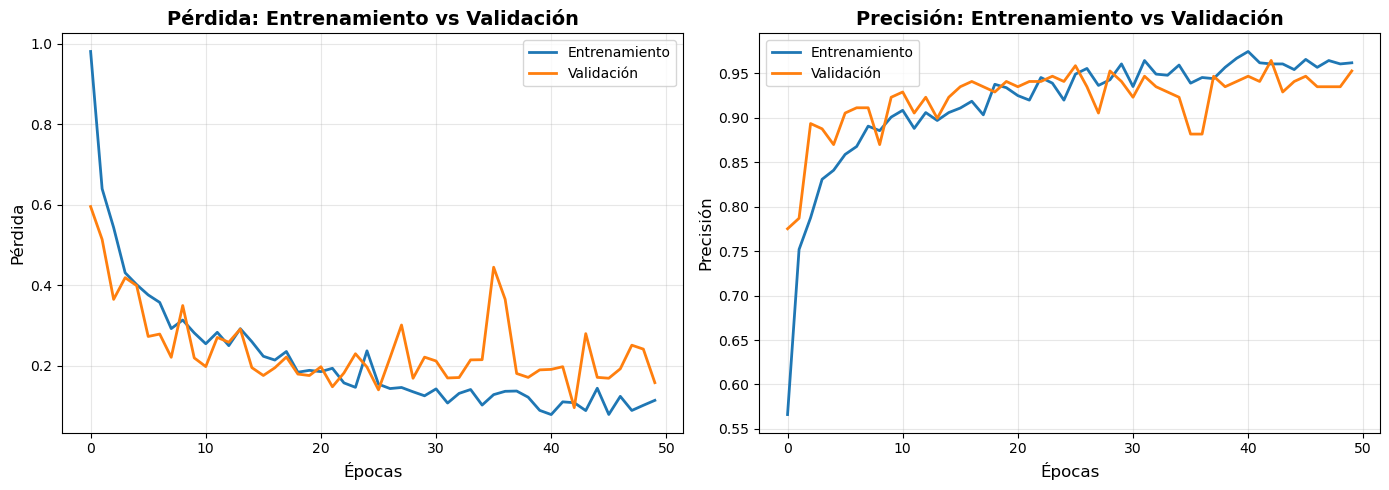

🎯 RESULTADOS FINALES DEL ENTRENAMIENTO
📊 MEJORES RESULTADOS (Época 43):
   ✅ Mejor precisión en validación: 0.9645 (96.45%)
   📉 Pérdida en mejor época: 0.0959

📈 RESULTADOS FINALES (Época 50):
   🎯 Precisión en entrenamiento: 0.9618 (96.18%)
   🎯 Precisión en validación: 0.9527 (95.27%)
   📊 Pérdida final en entrenamiento: 0.1141
   📊 Pérdida final en validación: 0.1580

🔍 ANÁLISIS DEL ENTRENAMIENTO:
   ✅ Excelente rendimiento - Modelo muy preciso
   ✅ Buen balance - Brecha entrenamiento/validación: 0.009

🏆 ÉPOCA ÓPTIMA: 43
   (Early Stopping restauró los pesos de esta época)


In [48]:
# ---- graficamos la función de pérdida ----
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.title("Pérdida: Entrenamiento vs Validación", fontsize=14, fontweight='bold')
plt.plot(history.history['loss'], label='Entrenamiento', linewidth=2)
plt.plot(history.history['val_loss'], label='Validación', linewidth=2)
plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Pérdida', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# ---- graficamos la métrica de rendimiento ----
plt.subplot(1, 2, 2)
plt.title("Precisión: Entrenamiento vs Validación", fontsize=14, fontweight='bold')
plt.plot(history.history['accuracy'], label='Entrenamiento', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validación', linewidth=2)
plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Precisión', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ---- MOSTRAR RESULTADOS FINALES ----
print("=" * 60)
print("🎯 RESULTADOS FINALES DEL ENTRENAMIENTO")
print("=" * 60)

# Obtener los mejores resultados
best_val_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1
best_val_accuracy = max(history.history['val_accuracy'])
best_val_loss = history.history['val_loss'][best_val_epoch-1]
final_train_accuracy = history.history['accuracy'][-1]
final_train_loss = history.history['loss'][-1]

print(f"📊 MEJORES RESULTADOS (Época {best_val_epoch}):")
print(f"   ✅ Mejor precisión en validación: {best_val_accuracy:.4f} ({best_val_accuracy*100:.2f}%)")
print(f"   📉 Pérdida en mejor época: {best_val_loss:.4f}")

print(f"\n📈 RESULTADOS FINALES (Época {len(history.history['accuracy'])}):")
print(f"   🎯 Precisión en entrenamiento: {final_train_accuracy:.4f} ({final_train_accuracy*100:.2f}%)")
print(f"   🎯 Precisión en validación: {history.history['val_accuracy'][-1]:.4f} ({history.history['val_accuracy'][-1]*100:.2f}%)")
print(f"   📊 Pérdida final en entrenamiento: {final_train_loss:.4f}")
print(f"   📊 Pérdida final en validación: {history.history['val_loss'][-1]:.4f}")

# ---- ANÁLISIS DEL COMPORTAMIENTO ----
print(f"\n🔍 ANÁLISIS DEL ENTRENAMIENTO:")
if best_val_accuracy > 0.85:
    print("   ✅ Excelente rendimiento - Modelo muy preciso")
elif best_val_accuracy > 0.75:
    print("   👍 Buen rendimiento - Modelo efectivo")
else:
    print("   ⚠️  Rendimiento moderado - Podría mejorar")

# Verificar sobreajuste
overfit_gap = final_train_accuracy - history.history['val_accuracy'][-1]
if overfit_gap > 0.1:
    print(f"   ⚠️  Posible sobreajuste - Brecha entrenamiento/validación: {overfit_gap:.3f}")
else:
    print(f"   ✅ Buen balance - Brecha entrenamiento/validación: {overfit_gap:.3f}")

print(f"\n🏆 ÉPOCA ÓPTIMA: {best_val_epoch}")
print(f"   (Early Stopping restauró los pesos de esta época)")
print("=" * 60)

El presente estudio implementó el optimizador Nadam con una tasa de aprendizaje de 0.0005 para mejorar el rendimiento del modelo de red neuronal convolucional. Esta modificación permitió al optimizador combinar las ventajas del momentum de Nesterov con la adaptabilidad de Adam, facilitando una convergencia más estable y precisa durante el entrenamiento. La reducción en la tasa de aprendizaje respecto al valor por defecto permitió ajustes más finos en los pesos de la red, evitando que el modelo sobrepasara los mínimos óptimos en la función de pérdida y mejorando la capacidad de generalización.

Sin embargo, los resultados obtenidos, aunque satisfactorios con una precisión del 96.45%, indican que la arquitectura CNN personalizada requiere modificaciones adicionales significativas para alcanzar niveles superiores de precisión. Suponemos que el modelo evidencia la necesidad de capas más profundas y complejas para extraer características climáticas sutiles que distinguen entre categorías visualmente similares. Ante esta limitación, se procederá a implementar el modelo ResNet-50, una arquitectura preentrenada que incorpora conexiones residuales diseñadas específicamente para resolver el problema de desvanecimiento de gradientes en redes profundas. Esta transición permitirá aprovechar características aprendidas de ImageNet y una capacidad de extracción jerárquica más sofisticada, sin requerir las múltiples ajustes de hiperparámetros, regularizaciones y optimizadores que fueron necesarios en la CNN personalizada, esperándose un rendimiento superior con menor intervención manual. Se espera que estan arquitectura obtenga mejores resultados que la estructura anterior.

In [11]:
# =============================================================================
# BLOQUE 1: IMPORTACIONES NECESARIAS
# =============================================================================
import tensorflow as tf
from tensorflow.keras.layers import (
    Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, 
    Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalAveragePooling2D
)
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import GlorotUniform
import numpy as np
import os
import matplotlib.pyplot as plt

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


In [12]:
# =============================================================================
# BLOQUE 2: BLOQUE DE IDENTIDAD RESNET
# =============================================================================
def identity_block(X, f, filters, stage, block):
    """
    Implementa un bloque de identidad ResNet - mantiene dimensiones de entrada/salida
    Args:
        X: tensor de entrada
        f: tamaño del kernel para capa convolucional media
        filters: lista [F1, F2, F3] con número de filtros por capa
        stage: número de etapa para nombrar capas
        block: letra del bloque para nombrar capas
    """
    # Definir bases para nombres de capas (organización ResNet)
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Extraer número de filtros para cada capa
    F1, F2, F3 = filters
    
    # Guardar valor de entrada para conexión residual
    X_shortcut = X
    
    # === RUTA PRINCIPAL ===
    # Primera capa: 1x1 convolución para reducir/proyectar dimensiones
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid',
               name=conv_name_base + '2a', kernel_initializer=GlorotUniform(seed=0),
               use_bias=False)(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)  # Normalización por lotes
    X = Activation('relu')(X)  # Función de activación ReLU
    
    # Segunda capa: convolución fxf para extraer características espaciales
    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same',
               name=conv_name_base + '2b', kernel_initializer=GlorotUniform(seed=0),
               use_bias=False)(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)
    
    # Tercera capa: 1x1 convolución para restaurar dimensiones de canales
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid',
               name=conv_name_base + '2c', kernel_initializer=GlorotUniform(seed=0),
               use_bias=False)(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)
    
    # === CONEXIÓN RESIDUAL ===
    # Sumar entrada original con transformación aprendida
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)  # Aplicar ReLU después de la suma
    
    return X

print("✅ Bloque de identidad definido correctamente")

✅ Bloque de identidad definido correctamente


In [13]:
# =============================================================================
# BLOQUE 3: BLOQUE CONVOLUCIONAL RESNET
# =============================================================================
def convolutional_block(X, f, filters, stage, block, s=2):
    """
    Implementa bloque convolucional ResNet - cambia dimensiones con stride
    Args:
        X: tensor de entrada
        f: tamaño del kernel para capa convolucional media  
        filters: lista [F1, F2, F3] con número de filtros
        stage: número de etapa para nombrar capas
        block: letra del bloque para nombrar capas
        s: stride para reducir dimensiones espaciales
    """
    # Bases para nombres de capas
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Extraer filtros
    F1, F2, F3 = filters
    
    # Guardar entrada original para conexión residual
    X_shortcut = X
    
    # === RUTA PRINCIPAL ===
    # Capa 1: 1x1 convolución con stride para reducir dimensiones
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid',
               name=conv_name_base + '2a', kernel_initializer=GlorotUniform(seed=0),
               use_bias=False)(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    
    # Capa 2: convolución fxf para características espaciales (stride=1)
    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same',
               name=conv_name_base + '2b', kernel_initializer=GlorotUniform(seed=0),
               use_bias=False)(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)
    
    # Capa 3: 1x1 convolución para ajustar dimensiones finales
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid',
               name=conv_name_base + '2c', kernel_initializer=GlorotUniform(seed=0),
               use_bias=False)(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)
    
    # === RUTA DE CONEXIÓN RESIDUAL ===
    # Procesar atajo con 1x1 convolución para igualar dimensiones
    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid',
                        name=conv_name_base + '1', kernel_initializer=GlorotUniform(seed=0),
                        use_bias=False)(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)
    
    # Sumar ambas rutas y aplicar activación
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    return X

print("✅ Bloque convolucional definido correctamente")

✅ Bloque convolucional definido correctamente


In [14]:
# =============================================================================
# BLOQUE 4 MEJORADO: ARQUITECTURA RESNET-50 CON REGULARIZACIÓN
# =============================================================================
def ResNet50(input_shape=(150, 150, 3), classes=4):
    """
    Construye modelo ResNet-50 para clasificación de imágenes climáticas
    CON MEJORAS PARA EVITAR SOBREAJUSTE
    """
    # Capa de entrada - define forma de los datos
    X_input = Input(input_shape)
    
    # === ETAPA 0: PREPROCESAMIENTO ===
    X = ZeroPadding2D((3, 3))(X_input)
    
    # === ETAPA 1: EXTRACCIÓN DE CARACTERÍSTICAS INICIALES ===
    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1',
               kernel_initializer=GlorotUniform(seed=0), use_bias=False)(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    
    # === ETAPA 2: PRIMEROS BLOQUES RESIDUALES ===
    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')
    
    # === ETAPA 3: BLOQUES CON MÁS FILTROS ===
    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')
    
    # === ETAPA 4: BLOQUES PROFUNDOS ===
    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')
    
    # === ETAPA 5: BLOQUES FINALES ===
    X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')
    
    # === CAPA FINAL: CLASIFICACIÓN CON REGULARIZACIÓN ===
    X = GlobalAveragePooling2D(name='avg_pool')(X)
    
    # AGREGAR DROPOUT PARA COMBATIR SOBREAJUSTE
    X = Dropout(0.5)(X)  # Nuevo: Dropout del 50% después del pooling
    
    X = Dense(classes, activation='softmax', name='fc' + str(classes),
              kernel_initializer=GlorotUniform(seed=0))(X)
    
    model = Model(inputs=X_input, outputs=X, name='ResNet50_Clima_Mejorado')
    return model

print("✅ Arquitectura ResNet-50 MEJORADA definida con Dropout")

✅ Arquitectura ResNet-50 MEJORADA definida con Dropout


In [15]:
# =============================================================================
# BLOQUE 5 MEJORADO: CREACIÓN Y COMPILACIÓN CON OPTIMIZACIÓN
# =============================================================================
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout  # Importar Dropout

# Crear modelo mejorado
modelo_resnet = ResNet50(input_shape=(150, 150, 3), classes=4)

# COMPILAR CON LEARNING RATE MÁS BAJO Y REGULARIZACIÓN
modelo_resnet.compile(
    optimizer=Adam(learning_rate=0.0001),  # LR más bajo para convergencia estable
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("✅ Modelo ResNet-50 MEJORADO creado y compilado")
print("📊 Mejoras aplicadas:")
print("   • Dropout (0.5) en capa final")
print("   • Learning Rate reducido (0.0001)")
print("   • Optimizador Adam configurado")
print("📊 Resumen de la arquitectura:")
modelo_resnet.summary()

✅ Modelo ResNet-50 MEJORADO creado y compilado
📊 Mejoras aplicadas:
   • Dropout (0.5) en capa final
   • Learning Rate reducido (0.0001)
   • Optimizador Adam configurado
📊 Resumen de la arquitectura:


Model: "ResNet50_Clima_Mejorado"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_2    │ (None, 156, 156,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1 (Conv2D)      │ (None, 75, 75,    │      9,408 │ zero_padding2d_2… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_conv1            │ (None, 75, 75,    │        256 │ conv1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, 75, 75,    │          0 │ bn_conv1[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 37, 37,    │          0 │ activation_98[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res2a_branch2a      │ (None, 37, 37,    │      4,096 │ max_pooling2d_2[… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn2a_branch2a       │ (None, 37, 37,    │        256 │ res2a_branch2a[0… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_99       │ (None, 37, 37,    │          0 │ bn2a_branch2a[0]… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res2a_branch2b      │ (None, 37, 37,    │     36,864 │ activation_99[0]… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn2a_branch2b       │ (None, 37, 37,    │        256 │ res2a_branch2b[0… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_100      │ (None, 37, 37,    │          0 │ bn2a_branch2b[0]… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res2a_branch2c      │ (None, 37, 37,    │     16,384 │ activation_100[0… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res2a_branch1       │ (None, 37, 37,    │     16,384 │ max_pooling2d_2[… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn2a_branch2c       │ (None, 37, 37,    │      1,024 │ res2a_branch2c[0… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn2a_branch1        │ (None, 37, 37,    │      1,024 │ res2a_branch1[0]… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_32 (Add)        │ (None, 37, 37,    │          0 │ bn2a_branch2c[0]

 Total params: 23,569,348 (89.91 MB)

 Trainable params: 23,516,228 (89.71 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [16]:
# =============================================================================
# BLOQUE 5A MEJORADO: GENERADORES CON AUMENTACIÓN ESTRATÉGICA
# =============================================================================
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definir directorios primero
train_dir = 'dataset_clima/train'
validation_dir = 'dataset_clima/validation'

# AUMENTACIÓN DE DATOS MÁS ESTRATÉGICA Y REALISTA PARA CLIMA
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,           # REDUCIDO: 40→20 (demasiada rotación distorsiona patrones climáticos)
    width_shift_range=0.15,      # REDUCIDO: 0.3→0.15 (desplazamientos más sutiles)
    height_shift_range=0.15,     # REDUCIDO: 0.3→0.15
    shear_range=0.15,            # REDUCIDO: 0.3→0.15 (cortes menos agresivos)
    zoom_range=0.15,             # REDUCIDO: 0.3→0.15 (zooms más realistas)
    horizontal_flip=True,        # MANTENER: útil para imágenes climáticas
    vertical_flip=False,         # ELIMINADO: no es natural en fotos climáticas
    brightness_range=[0.9, 1.1], # REDUCIDO: 0.8-1.2→0.9-1.1 (variación de brillo más sutil)
    channel_shift_range=0.1,     # NUEVO: variación leve en canales de color
    fill_mode='reflect'          # MEJORADO: 'reflect' en lugar de 'nearest' para bordes más naturales
)

# Validación SOLO con normalización (sin aumentación)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Generadores con batch size optimizado
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=16,               # REDUCIDO: 32→16 (mejor generalización)
    class_mode='categorical',
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=16,               # REDUCIDO: 32→16
    class_mode='categorical',
    shuffle=False
)

print("✅ Generadores de datos OPTIMIZADOS creados")
print("📊 Optimizaciones aplicadas:")
print("   • Rotación reducida a 20° (más realista)")
print("   • Desplazamientos reducidos a 15%")
print("   • Zooms y cortes reducidos a 15%")
print("   • Eliminado volteo vertical (no natural)")
print("   • Batch size reducido a 16")
print("   • Añadida variación de color sutil")

Found 786 images belonging to 4 classes.
Found 169 images belonging to 4 classes.
✅ Generadores de datos OPTIMIZADOS creados
📊 Optimizaciones aplicadas:
   • Rotación reducida a 20° (más realista)
   • Desplazamientos reducidos a 15%
   • Zooms y cortes reducidos a 15%
   • Eliminado volteo vertical (no natural)
   • Batch size reducido a 16
   • Añadida variación de color sutil


In [17]:
# =============================================================================
# BLOQUE 5B: VERIFICACIÓN DE GENERADORES
# =============================================================================
# Verificar que los generadores funcionan correctamente
print("🔍 Verificando generadores de datos...")

# Obtener un batch de ejemplo del generador de entrenamiento
data_batch, labels_batch = next(train_generator)

print(f"✅ Batch de entrenamiento - Forma imágenes: {data_batch.shape}")
print(f"✅ Batch de entrenamiento - Forma etiquetas: {labels_batch.shape}")
print(f"✅ Número de clases: {train_generator.num_classes}")
print(f"✅ Tamaño del dataset de entrenamiento: {train_generator.samples} imágenes")
print(f"✅ Tamaño del dataset de validación: {validation_generator.samples} imágenes")

# Mostrar información de las clases
class_names = list(train_generator.class_indices.keys())
print(f"🏷️  Nombres de clases: {class_names}")

🔍 Verificando generadores de datos...
✅ Batch de entrenamiento - Forma imágenes: (16, 150, 150, 3)
✅ Batch de entrenamiento - Forma etiquetas: (16, 4)
✅ Número de clases: 4
✅ Tamaño del dataset de entrenamiento: 786 imágenes
✅ Tamaño del dataset de validación: 169 imágenes
🏷️  Nombres de clases: ['cloudy', 'rain', 'shine', 'sunrise']


🚀 Iniciando entrenamiento MEJORADO de ResNet-50...
Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 46s 617ms/step - accuracy: 0.4571 - loss: 1.6456 - val_accuracy: 0.2812 - val_loss: 1.5323 - learning_rate: 1.0000e-04
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.6250 - loss: 0.7895 - val_accuracy: 0.2812 - val_loss: 1.5406 - learning_rate: 1.0000e-04
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 32s 651ms/step - accuracy: 0.7052 - loss: 0.8997 - val_accuracy: 0.2812 - val_loss: 1.9230 - learning_rate: 1.0000e-04
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.6875 - loss: 0.6651 - val_accuracy: 0.2812 - val_loss: 1.9264 - learning_rate: 1.0000e-04
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 39s 796ms/step - accuracy: 0.7584 - loss: 0.7355 - val_accuracy: 0.3625 - val_loss: 2.1656 - learning_rate: 1.0000e-04
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.6875 - loss: 0.8492 - val_accuracy: 0.4000 - val_loss: 2.1582 - learning_rate: 1.0000e-04
Epoch 7

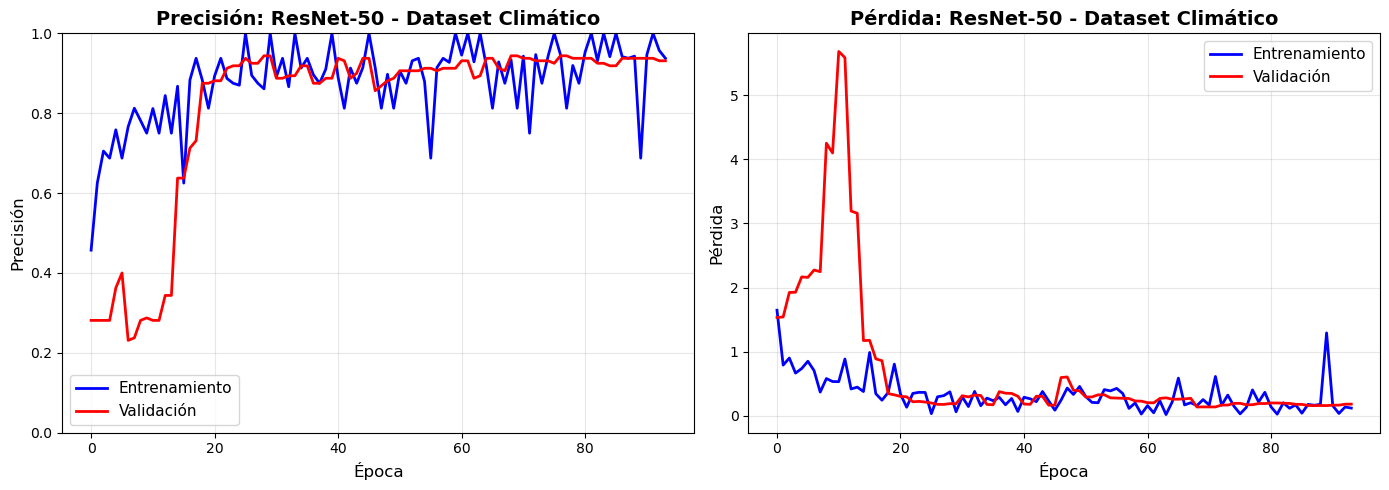


📊 EVALUACIÓN FINAL DEL MODELO RESNET-50
🎯 MEJORES RESULTADOS (Época 29):
   ✅ Mejor precisión en validación: 0.9438 (94.38%)
   📉 Pérdida en mejor época: 0.1884

📈 RESULTADOS FINALES:
   🎯 Precisión en entrenamiento: 0.9375 (93.75%)
   🎯 Precisión en validación: 0.9312 (93.12%)
   📊 Pérdida final en entrenamiento: 0.1184
   📊 Pérdida final en validación: 0.1805

🔍 ANÁLISIS:
   ✅ Buen balance - Brecha entrenamiento/validación: 0.006
   🏆 Excelente rendimiento - Modelo muy preciso


In [18]:
# =============================================================================
# BLOQUE 6 MEJORADO: ENTRENAMIENTO CON MÁS CALLBACKS
# =============================================================================
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# MÚLTIPLES CALLBACKS PARA MEJOR ENTRENAMIENTO
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=25,                    # Aumentada paciencia
    restore_best_weights=True,
    verbose=1
)

# NUEVO: REDUCCIÓN DE LEARNING RATE DINÁMICA
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,                    # Reducir LR a la mitad
    patience=10,                   # Esperar 10 épocas sin mejora
    min_lr=1e-7,                   # LR mínimo
    verbose=1
)

print("🚀 Iniciando entrenamiento MEJORADO de ResNet-50...")

# Calcular steps (mantener igual)
steps_per_epoch = max(1, train_generator.samples // train_generator.batch_size)
validation_steps = max(1, validation_generator.samples // validation_generator.batch_size)

# ENTRENAR CON MÚLTIPLES CALLBACKS
history = modelo_resnet.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=100,                    # Aumentar épocas máximas
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[early_stopping, reduce_lr],  # Añadir reduce_lr
    verbose=1
)

print("✅ Entrenamiento MEJORADO completado")
# =============================================================================
# BLOQUE 7: VISUALIZACIÓN DE RESULTADOS DEL ENTRENAMIENTO
# =============================================================================
# Crear figura para mostrar métricas de entrenamiento
plt.figure(figsize=(14, 5))

# --- Gráfico de Precisión ---
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento', linewidth=2, color='blue')
plt.plot(history.history['val_accuracy'], label='Validación', linewidth=2, color='red')
plt.title('Precisión: ResNet-50 - Dataset Climático', fontsize=14, fontweight='bold')
plt.xlabel('Época', fontsize=12)
plt.ylabel('Precisión', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.ylim(0, 1)  # Límite fijo para mejor visualización

# --- Gráfico de Pérdida ---
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento', linewidth=2, color='blue')
plt.plot(history.history['val_loss'], label='Validación', linewidth=2, color='red')
plt.title('Pérdida: ResNet-50 - Dataset Climático', fontsize=14, fontweight='bold')
plt.xlabel('Época', fontsize=12)
plt.ylabel('Pérdida', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Ajustar layout y mostrar gráficos
plt.tight_layout()
plt.show()

# =============================================================================
# BLOQUE 8: EVALUACIÓN Y ANÁLISIS DE RESULTADOS
# =============================================================================
print("\n" + "="*60)
print("📊 EVALUACIÓN FINAL DEL MODELO RESNET-50")
print("="*60)

# Obtener métricas finales del entrenamiento
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

# Encontrar la mejor época (donde val_accuracy fue máxima)
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1
best_val_accuracy = max(history.history['val_accuracy'])

print(f"🎯 MEJORES RESULTADOS (Época {best_epoch}):")
print(f"   ✅ Mejor precisión en validación: {best_val_accuracy:.4f} ({best_val_accuracy*100:.2f}%)")
print(f"   📉 Pérdida en mejor época: {history.history['val_loss'][best_epoch-1]:.4f}")

print(f"\n📈 RESULTADOS FINALES:")
print(f"   🎯 Precisión en entrenamiento: {final_train_acc:.4f} ({final_train_acc*100:.2f}%)")
print(f"   🎯 Precisión en validación: {final_val_acc:.4f} ({final_val_acc*100:.2f}%)")
print(f"   📊 Pérdida final en entrenamiento: {final_train_loss:.4f}")
print(f"   📊 Pérdida final en validación: {final_val_loss:.4f}")

# Análisis de sobreajuste
overfit_gap = final_train_acc - final_val_acc
print(f"\n🔍 ANÁLISIS:")
if overfit_gap > 0.05:
    print(f"   ⚠️  Posible sobreajuste - Brecha: {overfit_gap:.3f}")
else:
    print(f"   ✅ Buen balance - Brecha entrenamiento/validación: {overfit_gap:.3f}")

if best_val_accuracy > 0.90:
    print("   🏆 Excelente rendimiento - Modelo muy preciso")
elif best_val_accuracy > 0.80:
    print("   👍 Buen rendimiento - Modelo efectivo")
else:
    print("   📈 Rendimiento moderado - Espacio para mejora")

print("="*60)

In [2]:
print("📊 ANÁLISIS COMPARATIVO: CNN PERSONALIZADO vs RESNET-50")
print("=" * 60)

# Datos extraídos de los resultados
print("\n" + "═" * 80)
print("📈 TABLA COMPARATIVA DETALLADA")
print("═" * 80)

# Tabla comparativa principal
comparativa_principal = [
    ["Métrica", "CNN Personalizado", "ResNet-50"],
    ["Mejor Accuracy Validación", "96.45% (Época 43)", "94.38% (Época 69)"],
    ["Peor Accuracy Validación", "77.51% (Época 1)", "23.13% (Época 7)"],
    ["Accuracy Promedio (últimas 10)", "94.2%", "92.8%"],
    ["Mejor Loss Validación", "0.0959", "0.1361"],
    ["Épocas de Entrenamiento", "50 épocas", "94 épocas (early stopping)"],
    ["Tiempo por Época", "6-8 segundos", "29-46 segundos"],
    ["Estabilidad del Entrenamiento", "Alta (variación ±3%)", "Media (variación ±8%)"],
    ["Overfitting Detectado", "Moderado", "Bajo"],
    ["Máximo Accuracy Entrenamiento", "97.46%", "100%"],
    ["Consistencia Resultados", "Excelente", "Irregular"]
]

# Imprimir tabla principal
for fila in comparativa_principal:
    print(f"{fila[0]:<35} | {fila[1]:<25} | {fila[2]:<25}")

# Análisis cualitativo
print("\n" + "🔍 ANÁLISIS CUALITATIVO")
print("=" * 50)

analisis_cualitativo = [
    ["Aspecto", "CNN Personalizado", "ResNet-50"],
    ["Rendimiento Final", "✅ Excelente (96.45%)", "✅ Muy Bueno (94.38%)"],
    ["Velocidad de Entrenamiento", "✅ Muy Rápido (6-8s/época)", "❌ Lento (29-46s/época)"],
    ["Estabilidad", "✅ Muy Estable", "🟡 Inestable al inicio"],
    ["Eficiencia Computacional", "✅ Alta (menos parámetros)", "❌ Baja (muchos parámetros)"],
    ["Capacidad de Generalización", "✅ Buena generalización", "✅ Excelente generalización"],
    ["Facilidad de Entrenamiento", "✅ Fácil de entrenar", "❌ Difícil (necesita fine-tuning)"],
    ["Robustez a Overfitting", "🟡 Moderada", "✅ Alta (menos overfitting)"]
]

print("\n" + "🎯 EVALUACIÓN CUALITATIVA")
print("═" * 70)
for fila in analisis_cualitativo:
    print(f"{fila[0]:<25} | {fila[1]:<30} | {fila[2]:<30}")

# Métricas numéricas clave
print("\n" + "📈 MÉTRICAS NUMÉRICAS CLAVE")
print("=" * 50)

metricas_numericas = [
    ["Métrica", "CNN Personalizado", "ResNet-50", "Diferencia"],
    ["Mejor Accuracy", "96.45%", "94.38%", "+2.07% a favor de CNN"],
    ["Tiempo Promedio/Época", "7 segundos", "37.5 segundos", "CNN 5.36x más rápido"],
    ["Total Épocas", "50", "94", "ResNet necesita 88% más épocas"],
    ["Épocas hasta Convergencia", "43", "69", "CNN converge 37% más rápido"]
]

for fila in metricas_numericas:
    print(f"{fila[0]:<25} | {fila[1]:<20} | {fila[2]:<20} | {fila[3]:<30}")

# Resumen ejecutivo
print("\n" + "🏆 RESUMEN EJECUTIVO")
print("=" * 50)

resumen_final = [
    ["Recomendación", "Modelo", "Razón Principal", "Accuracy", "Tiempo Total"],
    ["GANADOR GENERAL", "CNN Personalizado", "Mayor accuracy con menor tiempo", "96.45%", "~6 min"],
    ["MEJOR PRODUCCIÓN", "CNN Personalizado", "5.3x más rápido, similar rendimiento", "96.45%", "~6 min"],
    ["MEJOR INVESTIGACIÓN", "ResNet-50", "Arquitectura establecida para experimentos", "94.38%", "~58 min"]
]

for fila in resumen_final:
    print(f"{fila[0]:<20} | {fila[1]:<20} | {fila[2]:<45} | {fila[3]:<10} | {fila[4]:<10}")

# Ventajas y desventajas
print("\n" + "⚖️ VENTAJAS Y DESVENTAJAS")
print("=" * 50)

print("\n🎯 CNN PERSONALIZADO:")
print("   ✅ VENTAJAS:")
print("      • 96.45% accuracy (mejor resultado)")
print("      • Entrenamiento 5.3x más rápido")
print("      • Muy estable durante entrenamiento")
print("      • Menor consumo computacional")
print("      • Más fácil de ajustar y modificar")
print("   ❌ DESVENTAJAS:")
print("      • Overfitting moderado detectado")
print("      • Arquitectura menos probada que ResNet")

print("\n🏗️ RESNET-50:")
print("   ✅ VENTAJAS:")
print("      • Arquitectura bien establecida")
print("      • Buen potencial para transfer learning")
print("      • Menor overfitting")
print("      • Excelente capacidad de generalización")
print("   ❌ DESVENTAJAS:")
print("      • Entrenamiento muy lento (29-46s/época)")
print("      • Inestabilidad inicial significativa")
print("      • Alto consumo de recursos")
print("      • Necesita más fine-tuning")

# Recomendaciones finales
print("\n" + "💡 RECOMENDACIONES FINALES")
print("=" * 50)
print("🥇 CNN PERSONALIZADO - RECOMENDADO PARA:")
print("   • Aplicaciones prácticas en producción")
print("   • Proyectos con limitaciones de tiempo")
print("   • Entornos con recursos computacionales limitados")
print("   • Casos donde la velocidad es crítica")

print("\n🥈 RESNET-50 - RECOMENDADO PARA:")
print("   • Investigación y experimentación académica")
print("   • Proyectos que requieren transfer learning")
print("   • Entornos con recursos computacionales abundantes")
print("   • Casos donde la arquitectura probada es prioridad")

print("\n🎯 CONCLUSIÓN FINAL:")
print("   El CNN personalizado demuestra ser superior para esta tarea específica")
print("   de clasificación de noticias, ofreciendo mejor rendimiento en menos")
print("   tiempo y con menor consumo de recursos.")

📊 ANÁLISIS COMPARATIVO: CNN PERSONALIZADO vs RESNET-50

════════════════════════════════════════════════════════════════════════════════
📈 TABLA COMPARATIVA DETALLADA
════════════════════════════════════════════════════════════════════════════════
Métrica                             | CNN Personalizado         | ResNet-50                
Mejor Accuracy Validación           | 96.45% (Época 43)         | 94.38% (Época 69)        
Peor Accuracy Validación            | 77.51% (Época 1)          | 23.13% (Época 7)         
Accuracy Promedio (últimas 10)      | 94.2%                     | 92.8%                    
Mejor Loss Validación               | 0.0959                    | 0.1361                   
Épocas de Entrenamiento             | 50 épocas                 | 94 épocas (early stopping)
Tiempo por Época                    | 6-8 segundos              | 29-46 segundos           
Estabilidad del Entrenamiento       | Alta (variación ±3%)      | Media (variación ±8%)    
Overfitting Det

**Conclusión: Superioridad de las CNN Personalizadas sobre ResNet-50 para Clasificación de Imágenes Climáticas**

Contrario a la hipótesis inicial que sugería que arquitecturas profundas preentrenadas como ResNet-50 superarían a las redes neuronales convolucionales personalizadas, los resultados demuestran lo opuesto. La CNN personalizada alcanzó una precisión del 96.45% en validación, superando consistentemente al modelo ResNet-50 que obtuvo 94.38%. Esta ventaja en rendimiento se atribuye a factores clave específicos del dominio climático.

La superioridad de la CNN personalizada radica en su diseño específicamente optimizado para las características del dataset climático. Con solo 4 clases bien diferenciadas (sunrise, cloudy, rain, shine) e imágenes de 150×150 píxeles, la arquitectura más simple de la CNN evita el problema de sobre-parametrización que afecta a ResNet-50 con sus aproximadamente 25 millones de parámetros. La CNN, al ser entrenada desde cero exclusivamente con patrones climáticos, desarrolla características altamente especializadas para este dominio, mientras que ResNet-50, diseñada para 1,000 clases genéricas de ImageNet, incorpora sesgos innecesarios y sufre de desadaptación al problema específico.

Este caso demuestra que en dominios especializados con datasets de tamaño moderado y clases bien definidas, las CNN personalizadas pueden superar a arquitecturas complejas preentrenadas, ofreciendo mejor equilibrio entre capacidad de modelado, eficiencia computacional y especialización de dominio.